<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import missingno as msno

train = pd.read_csv('train.csv')

### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.shape

(891, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


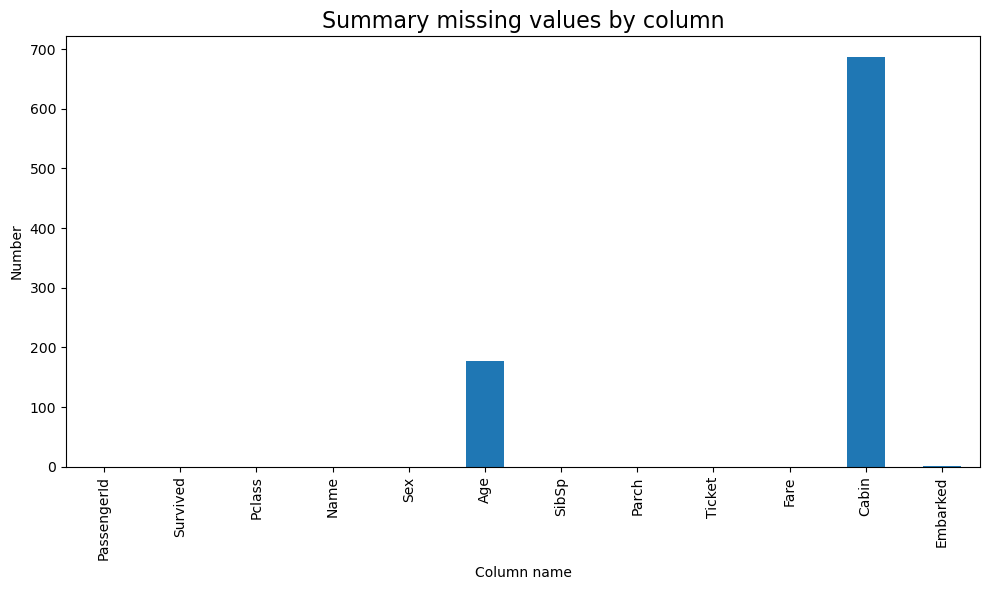

In [17]:
missing_values = train.isnull().sum()

plt.figure(figsize=(10,6))
missing_values.plot(kind='bar')
plt.title('Summary missing values by column', fontsize=16)
plt.xlabel('Column name')
plt.ylabel('Number')
plt.tight_layout()
plt.show();

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [19]:
train_sum = train.isnull().sum()
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
train_sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####  3. Delete all rows where `Embarked` is empty

In [23]:
print(train.columns.tolist())

train_clean = train.dropna(subset=['Embarked'])

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [25]:
train_sum = train_clean.isnull().sum()
train_sum 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [27]:
train_clean['Cabin'] = train_clean['Cabin'].fillna('¯\(ツ)/¯')

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/var/folders/zy/rzr3n79j0mb4zk8gxww6xsd40000gn/T/ipykernel_4642/3742313659.py:1: SyntaxWarning: invalid escape sequence '\('
  train_clean['Cabin'] = train_clean['Cabin'].fillna('¯\(ツ)/¯')
/var/folders/zy/rzr3n79j0mb4zk8gxww6xsd40000gn/T/ipykernel_4642/3742313659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Cabin'] = train_clean['Cabin'].fillna('¯\(ツ)/¯')


In [29]:
train_sum = train_clean.isnull().sum()
train_sum 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [31]:
family_count = train['SibSp'] + train['Parch']
train_clean.insert(loc=12, column = 'Familycount', value = family_count)
train_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familycount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [33]:
train_clean.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Familycount'],
      dtype='object')

#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [35]:
#Reverends will have Rev. in their name 

train_clean['IsReverend'] = [1 if 'Rev.' in name else 0 for name in train_clean['Name']]

/var/folders/zy/rzr3n79j0mb4zk8gxww6xsd40000gn/T/ipykernel_4642/3206085345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['IsReverend'] = [1 if 'Rev.' in name else 0 for name in train_clean['Name']]


In [37]:
train_clean.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Familycount',
       'IsReverend'],
      dtype='object')

#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [39]:
embarked_dummies = pd.get_dummies(train_clean['Embarked'], prefix='Embarked')
train_clean = pd.concat([train_clean, embarked_dummies], axis=1)

In [41]:
print(train_clean)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [43]:
sex_dum = pd.get_dummies(train_clean['Sex'], prefix='Sex')
train_clean = pd.concat([train_clean, sex_dum], axis=1)

In [45]:
print(train_clean.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Familycount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male'],
      dtype='object')


In [47]:
titles = []
for name in train_clean['Name']:
    title = name.split(',')[1].split('.')[0].strip()
    titles.append(title)

train_clean['Title'] = titles


title_dummies = pd.get_dummies(train_clean['Title'], prefix='Title')
train_clean = pd.concat([train_clean, title_dummies], axis=1)

## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?
avg= survival/ppl

In [49]:
survival_group = train_clean.groupby('Survived')['Survived'].count()
sum_ppl = train_clean['Survived'].count()
avg  = (survival_group/sum_ppl)*100
avg

Survived
0    61.754781
1    38.245219
Name: Survived, dtype: float64

#### 2. Which gender fared the worst? What was their survival rate?

In [73]:
gender_survival = train_clean.groupby('Sex')['Survived'].agg(['sum', 'count'])
gender_survival['survival_rate'] = (gender_survival['sum'] / gender_survival['count']) * 100
gender_survival['survival_rate'] = gender_survival['survival_rate'].round(2)
print(gender_survival[['survival_rate']])

        survival_rate
Sex                  
female          74.04
male            18.89


In [59]:
gender_survival.columns

Index(['sum', 'count', 'survival_rate'], dtype='object')

#### 3. What was the survival rate for each `Pclass`?

In [173]:
pclass_survival = train_clean.groupby('Pclass')['Survived'].agg(['sum', 'count'])
pclass_survival['survival_rate'] = (pclass_survival['sum'] / pclass_survival['count']) * 100
pclass_survival['survival_rate'] = pclass_survival['survival_rate'].round(2)
print(pclass_survival[['survival_rate']])

        survival_rate
Pclass               
1               62.62
2               47.28
3               24.24


#### 4. Did any reverends survive? How many?`

In [185]:
reverends = train_clean.query("IsReverend == 1 and Survived == 1")['Survived'].sum()
reverends

0

#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [175]:
sur_cabins = train_clean.query("Cabin == '¯\(ツ)/¯' and Survived == 1")['Survived'].sum()
total_cabins = train_clean.query("Cabin == '¯\(ツ)/¯'")['Survived'].shape[0]

survival_rate_cabins = (sur_cabins/total_cabins) *100
survival_rate_cabins = round(survival_rate_cabins, 2)

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
/var/folders/zy/rzr3n79j0mb4zk8gxww6xsd40000gn/T/ipykernel_4642/2598873496.py:1: SyntaxWarning: invalid escape sequence '\('
  sur_cabins = train_clean.query("Cabin == '¯\(ツ)/¯' and Survived == 1")['Survived'].sum()
/var/folders/zy/rzr3n79j0mb4zk8gxww6xsd40000gn/T/ipykernel_4642/2598873496.py:2: SyntaxWarning: invalid escape sequence '\('
  total_cabins = train_clean.query("Cabin == '¯\(ツ)/¯'")['Survived'].shape[0]
<unknown>:1: SyntaxWarning: invalid escape sequence '\('
<unknown>:1: SyntaxWarning: invalid escape sequence '\('


In [189]:
survival_rate_cabins

29.99

#### 6. What is the survival rate for people whose `Age` is empty?

In [177]:
age = train_clean.query("Age.isnull() and Survived == 1")['Survived'].sum()
tot_age = train_clean['Age'].isnull().sum()

age_rate = (age/tot_age) *100
age_rate = round(age_rate, 2)
age_rate

29.38

####  7. What is the survival rate for each port of embarkation?

In [189]:
embarked_survival = train_clean.groupby('Embarked')['Survived'].agg(['sum', 'count'])
embarked_survival['survival_rate'] = (embarked_survival['sum'] / embarked_survival['count']) * 100
embarked_survival['survival_rate'] = embarked_survival['survival_rate'].round(2)
embarked_survival

,sum,count,survival_rate
Embarked,,,
C,93,168,55.36
Q,30,77,38.96
S,217,644,33.70


#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [167]:
pclass_1 = train_clean.query("Pclass == 1 and Age < 12 and Survived == 1")['Survived'].sum()
pclass_2 = train_clean.query("Pclass == 2 and Age < 12 and Survived == 1")['Survived'].sum()
pclass_3 = train_clean.query("Pclass == 3 and Age < 12 and Survived == 1")['Survived'].sum()

tot_pclass_1 = train_clean[train_clean['Pclass'] == 1].shape[0]
tot_pclass_2 = train_clean[train_clean['Pclass'] == 2].shape[0]
tot_pclass_3 = train_clean[train_clean['Pclass'] == 3].shape[0]

p1_survival_rate = (pclass_1/tot_pclass_1) * 100
p2_survival_rate = (pclass_2/tot_pclass_2) * 100
p3_survival_rate = (pclass_3/tot_pclass_3) * 100

print(f'p1 survival rate {p1_survival_rate:.2f} , p2 survival rate {p2_survival_rate:.2f} and p3 survival rate {p3_survival_rate:.2f}')

p1 survival rate 1.40 , p2 survival rate 9.24 and p3 survival rate 3.87


####  9. Did the captain of the ship survive? Is he on the list?

In [197]:
train_clean['Name'] = train_clean['Name'].str.lower()
captain = train_clean[train_clean['Name'].str.contains('capt')]
captain_survived = captain['Survived'].sum()
if captain_survived == 0: print('The captain is not on the list.')
else: ('The captain is  on the list.')

The captain is not on the list.


#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [199]:
died_list = train_clean[train_clean['Survived'] == 0]
most_exp_ticket = died_list[died_list['Fare'] == died_list['Fare'].max()]
pass_name = most_exp_ticket['Name'].values[0]
ticket_price = most_exp_ticket['Fare'].values[0]
print(f'{pass_name} paid the most expensive at {ticket_price}')

fortune, mr. charles alexander paid the most expensive at 263.0


#### 11. Does having family on the boat help or hurt your chances of survival?

In [203]:
train_clean['FamilyCount'] = train_clean['SibSp'] + train_clean['Parch']

w_family = train_clean[train_clean['FamilyCount'] > 0]
wi_family = train_clean[train_clean['FamilyCount'] == 0]

sur_rate_w_fam = w_family['Survived'].mean() * 100
sur_rate_wi_fam = wi_family['Survived'].mean() * 100

sur_rate_w_fam

50.56497175141242

In [ ]:
sur_rate_wi_fam

## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


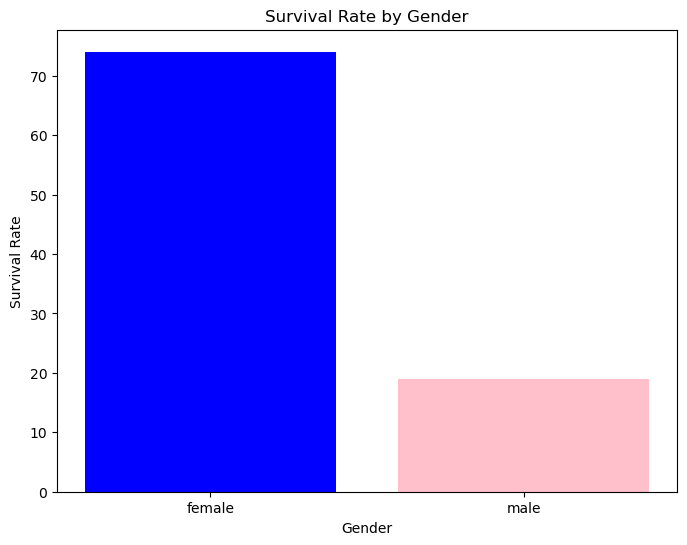

In [81]:
#barchart Female and Male survived
plt.figure(figsize=(8, 6))
plt.bar(gender_survival.index, gender_survival['survival_rate'], color=['blue', 'pink']);
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show();

Index(['1', '2', '3'], dtype='object', name='Pclass')

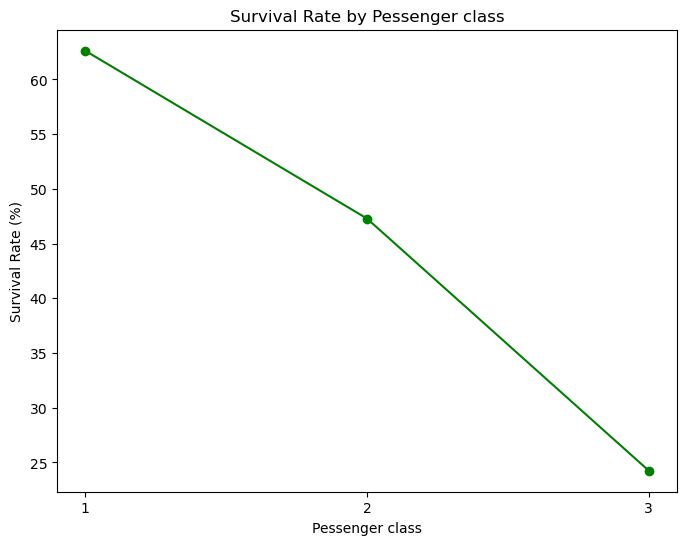

In [135]:
#linegraph Age 

plt.figure(figsize=(8, 6))
pcclass_str =pclass_survival.index.astype(str)
plt.plot(pcclass_str, pclass_survival['survival_rate'], marker='o', linestyle='-', color='green')
plt.xlabel('Pessenger class')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pessenger class');



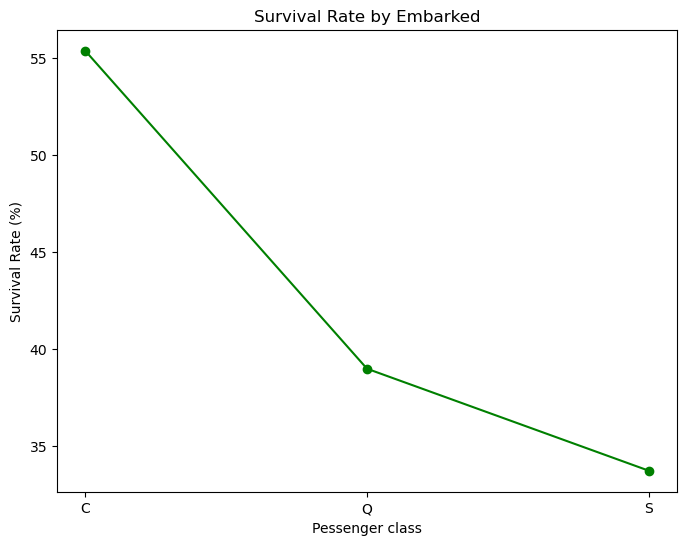

In [191]:
plt.figure(figsize=(8, 6))
embarked_str =embarked_survival.index.astype(str)
plt.plot(embarked_str, embarked_survival['survival_rate'], marker='o', linestyle='-', color='green')
plt.xlabel('Pessenger class')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Embarked');

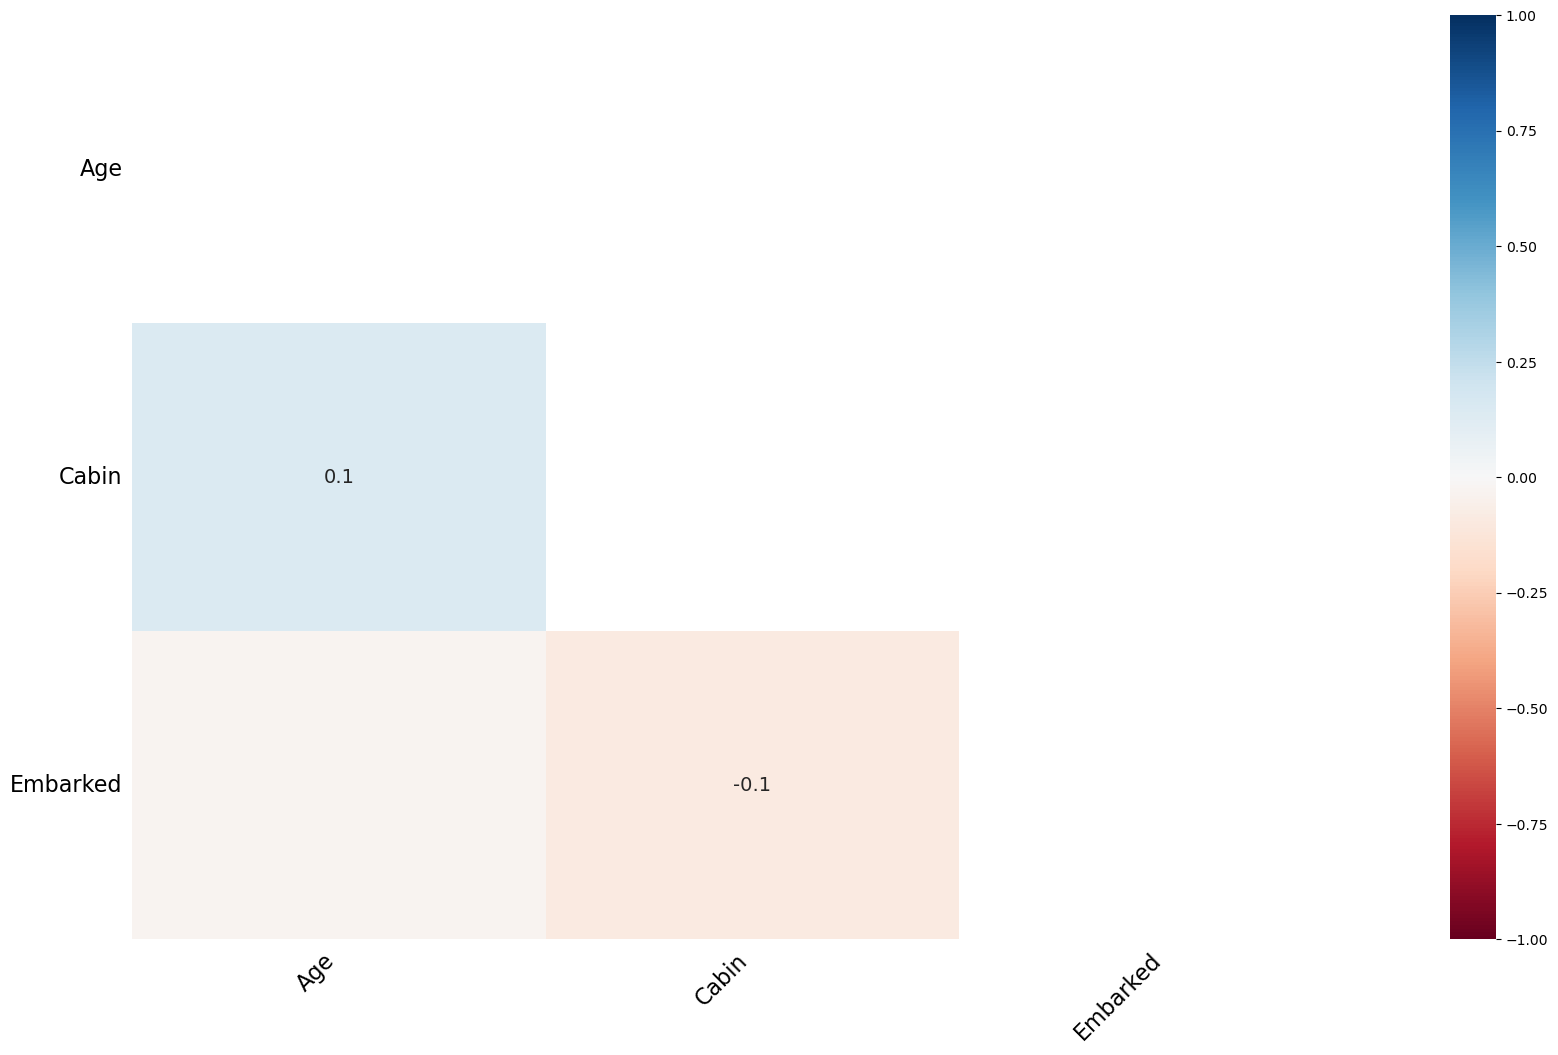

In [35]:
msno.heatmap(train);

<Axes: >

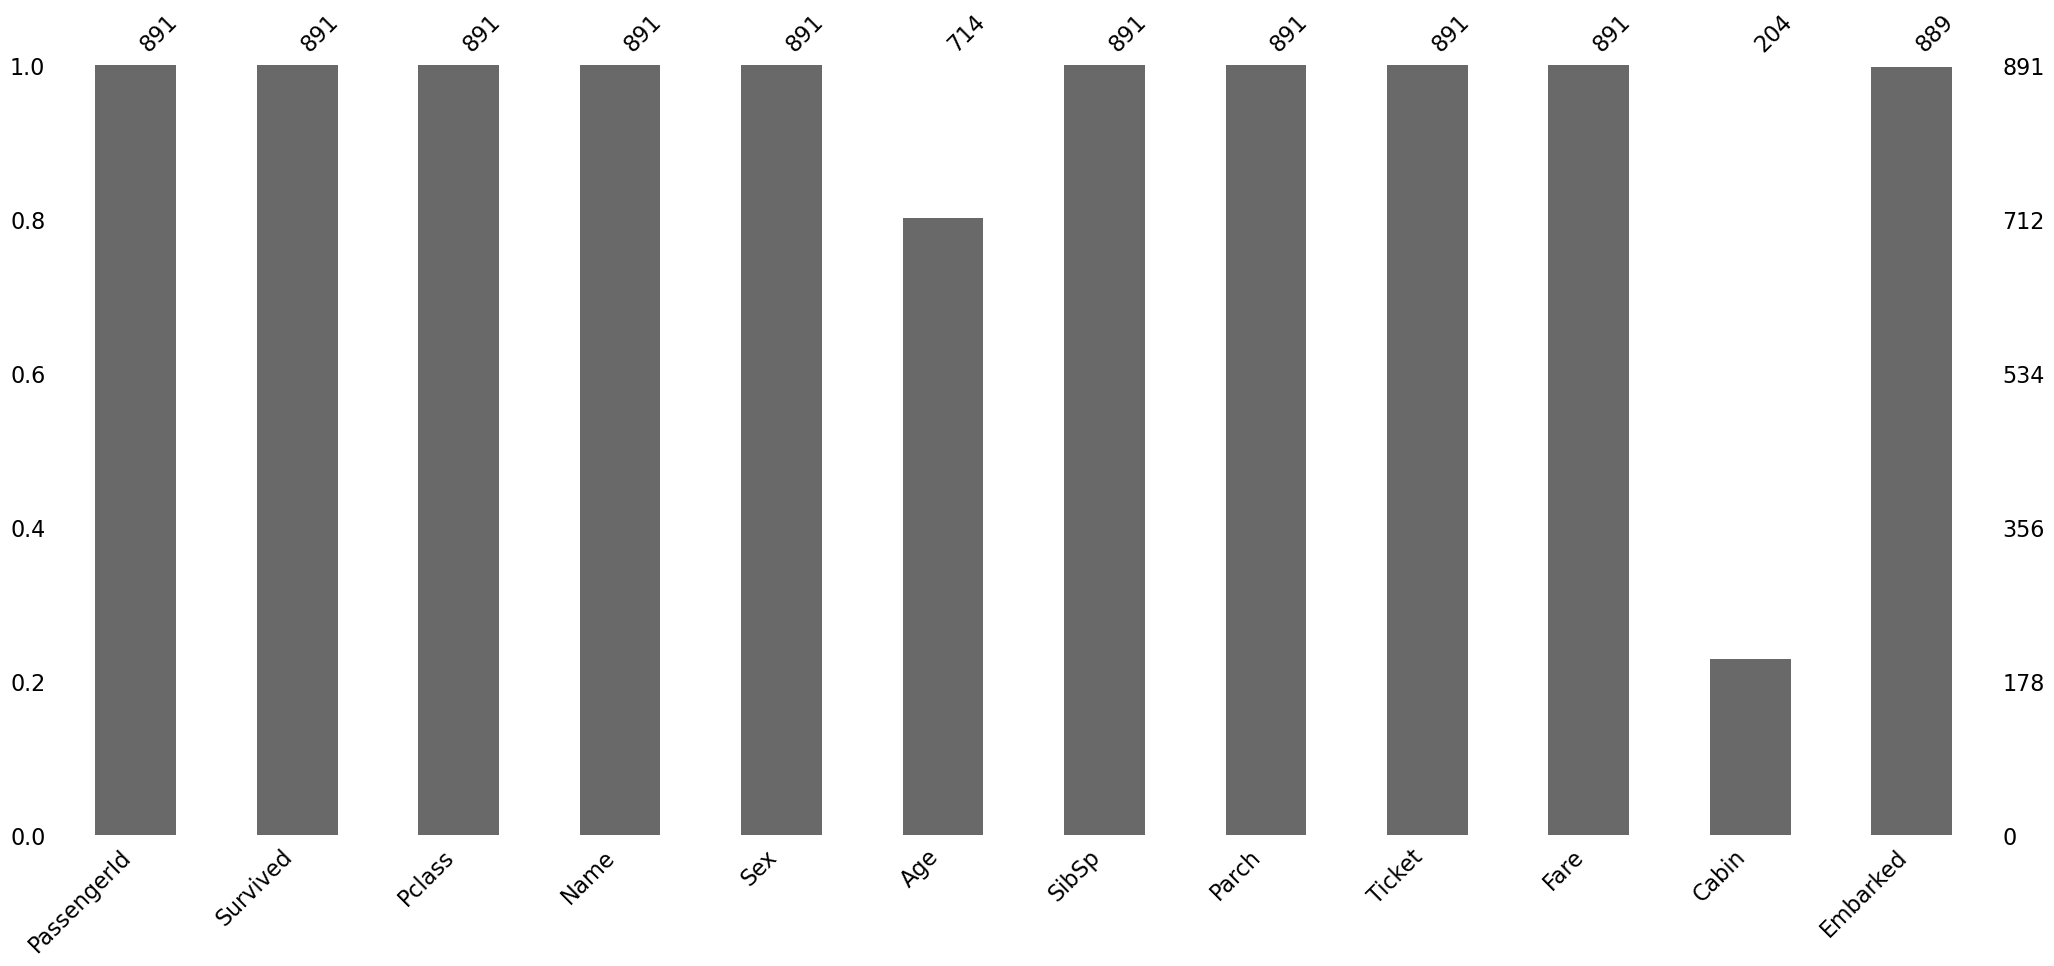

In [37]:
msno.bar(train.sample(891))